# Importing python libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Importing data

In [2]:
missing_values = ["n/a", "na", "--",'?']
data = pd.read_csv("train.csv", na_values = missing_values)


In [3]:
data.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,NaN,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [4]:
data.shape

(7007, 23)

# Handling Missing values

In [5]:
data.isnull().sum()

Deal_title                  0
Lead_name                   0
Industry                    1
Deal_value                 51
Weighted_amount           525
Date_of_creation            0
Pitch                       0
Contact_no                  0
Lead_revenue                0
Fund_category               0
Geography                 972
Location                   11
POC_name                    8
Designation                 0
Lead_POC_email              0
Hiring_candidate_role       0
Lead_source                 0
Level_of_meeting            0
Last_lead_update         1218
Internal_POC                0
Resource                  149
Internal_rating             0
Success_probability         0
dtype: int64

In [6]:
vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]

# calculate the percentage of missing (as we did in section 3)
# using the isnull() and mean() methods from pandas
data_na = data[vars_with_na].isnull().mean()

# transform the array into a dataframe
data_na = pd.DataFrame(data_na.reset_index())

# add column names to the dataframe
data_na.columns = ['variable', 'na_percentage']

# order the dataframe according to percentage of na per variable
data_na.sort_values(by='na_percentage', ascending=False, inplace=True)

# show
data_na

,variable,na_percentage
6,Last_lead_update,0.173826
3,Geography,0.138718
2,Weighted_amount,0.074925
7,Resource,0.021264
1,Deal_value,0.007278
4,Location,0.001570
5,POC_name,0.001142
0,Industry,0.000143


There are 7 columns which has missing values. The avobe figure shows the percentage of missing of missing value.

As we can see that deal value and weighted amount have '$' sign in their columns, so we have to deal with such, So i have created a function that replace the sign with space.

In [7]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [8]:
data['Deal_value'] = data['Deal_value'].apply(clean_currency).astype('float')
data['Weighted_amount'] = data['Weighted_amount'].apply(clean_currency).astype('float')

In [9]:
data['Deal_value'].fillna(data['Deal_value'].mean(), inplace=True)
data['Weighted_amount'].fillna(data['Weighted_amount'].mean(), inplace=True)

In [10]:
data['Geography'].fillna(data['Geography']=='Missing', inplace = True)

In [11]:
data['Location'].fillna(data['Location'].mode()[0], inplace = True)

In [12]:
data['Industry'].fillna(data['Industry'].mode()[0], inplace = True)

In [13]:
data['Resource'].replace('We have all the requirements','Yes',inplace=True)
data['Resource'].replace('Deliverable','Yes',inplace=True)
data['Resource'].replace('Cannot deliver','No',inplace=True)
data['Resource'].replace('Not enough','No',inplace=True)

In [14]:
data['Resource'].fillna(data['Resource'].mode()[0], inplace = True)

In [15]:
data['Last_lead_update'].fillna(data['Last_lead_update']=='Missing', inplace = True)

In [17]:
data.isnull().sum()

Deal_title               0
Lead_name                0
Industry                 0
Deal_value               0
Weighted_amount          0
Date_of_creation         0
Pitch                    0
Contact_no               0
Lead_revenue             0
Fund_category            0
Geography                0
Location                 0
POC_name                 8
Designation              0
Lead_POC_email           0
Hiring_candidate_role    0
Lead_source              0
Level_of_meeting         0
Last_lead_update         0
Internal_POC             0
Resource                 0
Internal_rating          0
Success_probability      0
dtype: int64

Null values has been handled with mean and mode factor.

#Dropping columns which is of no use.

In [18]:
columns=['Deal_title','Lead_name','Contact_no','Lead_POC_email','Internal_POC','Location','Hiring_candidate_role','POC_name','Industry']
data.drop(columns, inplace=True,axis=1)

In [19]:
data.head()

,Deal_value,Weighted_amount,Date_of_creation,Pitch,Lead_revenue,Fund_category,Geography,Designation,Lead_source,Level_of_meeting,Last_lead_update,Resource,Internal_rating,Success_probability
0,320506.0,2.067264e+06,2020-03-29,Product_2,50 - 100 Million,Category 2,USA,Executive Vice President,Website,Level 3,No track,No,3,73.6
1,39488.0,2.408768e+05,2019-07-10,Product_2,500 Million - 1 Billion,Category 4,India,Chairman/CEO/President,Others,Level 1,Did not hear back after Level 1,No,5,58.9
2,359392.0,2.407926e+06,2019-07-27,Product_1,500 Million - 1 Billion,Category 4,USA,SVP/General Counsel,Marketing Event,Level 1,False,No,4,68.8
3,76774.0,4.683214e+05,2021-01-30,Product_2,500 Million - 1 Billion,Category 3,USA,CEO/Co-Founder/Chairman,Contact Email,Level 2,Did not hear back after Level 1,Yes,1,64.5
4,483896.0,1.569884e+06,2019-05-22,Product_2,50 - 100 Million,Category 3,India,Executive Vice President,Website,Level 2,Up-to-date,No,4,62.4


#Checking Descritization of Deal value and weighted amount

#Deal Value

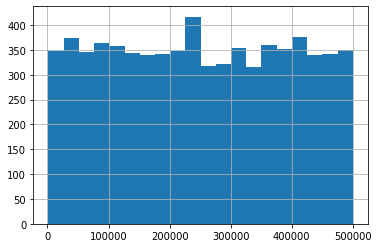

In [21]:
data['Deal_value'].hist(bins=20)

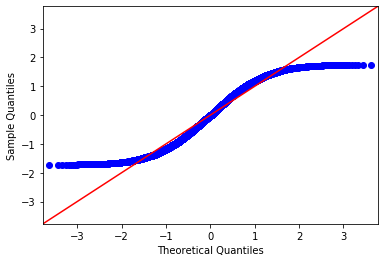

In [22]:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.qqplot(data['Deal_value'], stats.t, distargs=(4,),fit=True, line="45")
plt.show()

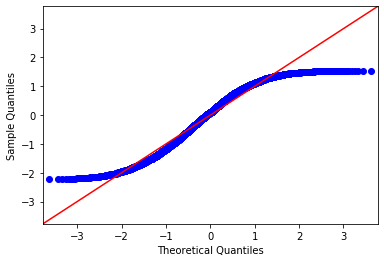

In [23]:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.qqplot(data['Deal_value']**(1/1.5), stats.t, distargs=(4,),fit=True, line="45")
plt.show()

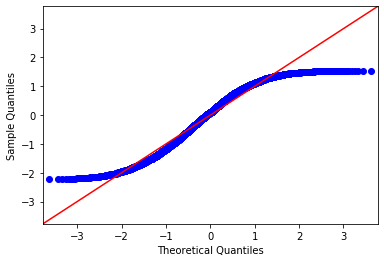

In [26]:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.qqplot(data['Deal_value'], stats.t, distargs=(4,),fit=True, line="45")
plt.show()

In [27]:
data['Deal_value']=data['Deal_value']**(1/1.5)


In [28]:
#Weighted_amount

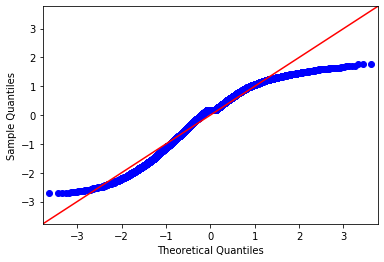

In [29]:
fig = sm.qqplot(data['Weighted_amount']**(1/2), stats.t, distargs=(4,),fit=True, line="45")
plt.show()

In [30]:
data['Weighted_amount']=data['Weighted_amount']**(1/2)

During these process I have used reciprocal descritization, as reciprocal was giving me better result than all.

#Data of Creation

In [32]:
type(data['Date_of_creation'])

pandas.core.series.Series

In [33]:
data['Date_of_creation']=pd.to_datetime(data['Date_of_creation'],format='%Y-%m-%d')

In [34]:
data['Year']=data['Date_of_creation'].dt.year
data['Month']=data['Date_of_creation'].dt.month
data['Weekday']=data['Date_of_creation'].dt.weekday

Making month, year, weekday columns from date columns.

In [35]:
data.head()

,Deal_value,Weighted_amount,Date_of_creation,Pitch,Lead_revenue,Fund_category,Geography,Designation,Lead_source,Level_of_meeting,Last_lead_update,Resource,Internal_rating,Success_probability,Year,Month,Weekday
0,279.922814,1437.798213,2020-03-29,Product_2,50 - 100 Million,Category 2,USA,Executive Vice President,Website,Level 3,No track,No,3,73.6,2020,3,6
1,110.375681,490.792013,2019-07-10,Product_2,500 Million - 1 Billion,Category 4,India,Chairman/CEO/President,Others,Level 1,Did not hear back after Level 1,No,5,58.9,2019,7,2
2,294.538122,1551.749464,2019-07-27,Product_1,500 Million - 1 Billion,Category 4,USA,SVP/General Counsel,Marketing Event,Level 1,False,No,4,68.8,2019,7,5
3,148.322247,684.340120,2021-01-30,Product_2,500 Million - 1 Billion,Category 3,USA,CEO/Co-Founder/Chairman,Contact Email,Level 2,Did not hear back after Level 1,Yes,1,64.5,2021,1,5
4,336.168068,1252.949986,2019-05-22,Product_2,50 - 100 Million,Category 3,India,Executive Vice President,Website,Level 2,Up-to-date,No,4,62.4,2019,5,2


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


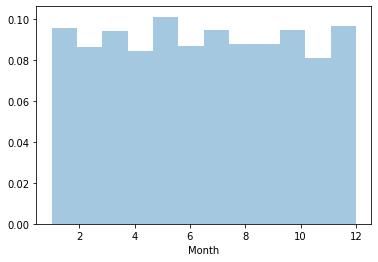

In [36]:
sns.distplot(data[data['Year']==2020].Month, bins=12, kde=False, norm_hist=True)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


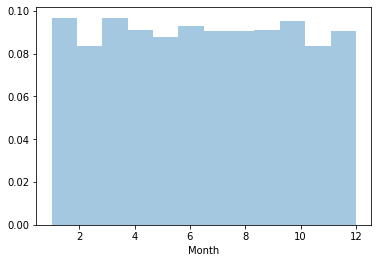

In [37]:
sns.distplot(data[data['Year']==2019].Month, bins=12, kde=False, norm_hist=True)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


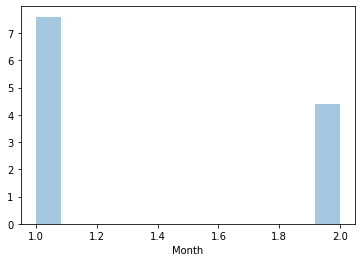

In [38]:
sns.distplot(data[data['Year']==2021].Month, bins=12, kde=False, norm_hist=True)

In [39]:
#Label Encoding

In [40]:
objList = data.select_dtypes(include = "object").columns
objList

Index(['Pitch', 'Lead_revenue', 'Fund_category', 'Geography', 'Designation',
       'Lead_source', 'Level_of_meeting', 'Last_lead_update', 'Resource'],
      dtype='object')

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    data[feat] = le.fit_transform(data[feat].astype(str))

We converted categorical columns with integer columns with label encoding.

In [42]:
data.head()

,Deal_value,Weighted_amount,Date_of_creation,Pitch,Lead_revenue,Fund_category,Geography,Designation,Lead_source,Level_of_meeting,Last_lead_update,Resource,Internal_rating,Success_probability,Year,Month,Weekday
0,279.922814,1437.798213,2020-03-29,1,1,1,2,7,3,2,7,0,3,73.6,2020,3,6
1,110.375681,490.792013,2019-07-10,1,2,3,1,4,2,0,2,0,5,58.9,2019,7,2
2,294.538122,1551.749464,2019-07-27,0,2,3,2,8,1,0,3,0,4,68.8,2019,7,5
3,148.322247,684.340120,2021-01-30,1,2,2,2,2,0,1,2,1,1,64.5,2021,1,5
4,336.168068,1252.949986,2019-05-22,1,1,2,1,7,3,1,9,0,4,62.4,2019,5,2


In [43]:
columns=['Date_of_creation']
data.drop(columns,axis=1,inplace=True)

# Feature selection

In [44]:
data.corr()

,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Designation,Lead_source,Level_of_meeting,Last_lead_update,Resource,Internal_rating,Success_probability,Year,Month,Weekday
Deal_value,1.000000,0.951019,-0.020131,0.003453,-0.006034,0.012162,0.011233,-0.026143,-0.007820,0.005354,0.019702,0.003510,0.023845,0.005956,-0.002438,0.008752
Weighted_amount,0.951019,1.000000,-0.019853,0.006278,-0.004000,0.024657,0.009379,-0.024387,0.045964,0.006772,0.017165,0.035083,0.037012,0.009411,0.003086,0.006603
Pitch,-0.020131,-0.019853,1.000000,0.007298,0.003410,-0.017737,0.003585,0.020752,-0.028846,0.005328,0.011845,0.023643,0.008719,0.005131,-0.010524,0.016624
Lead_revenue,0.003453,0.006278,0.007298,1.000000,0.005064,-0.003425,-0.012584,-0.015423,-0.012833,0.008480,-0.006845,-0.003950,0.015269,-0.004160,0.002419,-0.012670
Fund_category,-0.006034,-0.004000,0.003410,0.005064,1.000000,0.003320,-0.000432,-0.009635,-0.000172,-0.001840,0.006758,-0.004508,-0.050673,-0.016917,0.029287,0.002357
Geography,0.012162,0.024657,-0.017737,-0.003425,0.003320,1.000000,0.014921,-0.001651,0.005936,0.010444,-0.022470,0.012983,0.113625,0.012689,-0.028991,-0.019927
Designation,0.011233,0.009379,0.003585,-0.012584,-0.000432,0.014921,1.000000,0.007115,0.022790,-0.003891,0.002963,-0.000726,-0.004426,0.006757,0.009007,0.000438
Lead_source,-0.026143,-0.024387,0.020752,-0.015423,-0.009635,-0.001651,0.007115,1.000000,-0.009614,-0.005316,-0.017115,0.015634,0.052177,0.011994,-0.009863,0.017917
Level_of_meeting,-0.007820,0.045964,-0.028846,-0.012833,-0.000172,0.005936,0.022790,-0.009614,1.000000,0.001975,0.001717,0.018111,0.095374,-0.006586,-0.001552,0.002035
Last_lead_update,0.005354,0.006772,0.005328,0.008480,-0.001840,0.010444,-0.003891,-0.005316,0.001975,1.000000,-0.005995,0.008475,-0.000423,0.017929,0.007024,-0.010166


In [45]:
cols = list(data.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('Success_probability')) #Remove b from list
data = data[cols+['Success_probability']]

In [46]:
data.head()

,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Designation,Lead_source,Level_of_meeting,Last_lead_update,Resource,Internal_rating,Year,Month,Weekday,Success_probability
0,279.922814,1437.798213,1,1,1,2,7,3,2,7,0,3,2020,3,6,73.6
1,110.375681,490.792013,1,2,3,1,4,2,0,2,0,5,2019,7,2,58.9
2,294.538122,1551.749464,0,2,3,2,8,1,0,3,0,4,2019,7,5,68.8
3,148.322247,684.340120,1,2,2,2,2,0,1,2,1,1,2021,1,5,64.5
4,336.168068,1252.949986,1,1,2,1,7,3,1,9,0,4,2019,5,2,62.4


In [47]:
data.shape

(7007, 16)

In [48]:
#Feature Selection

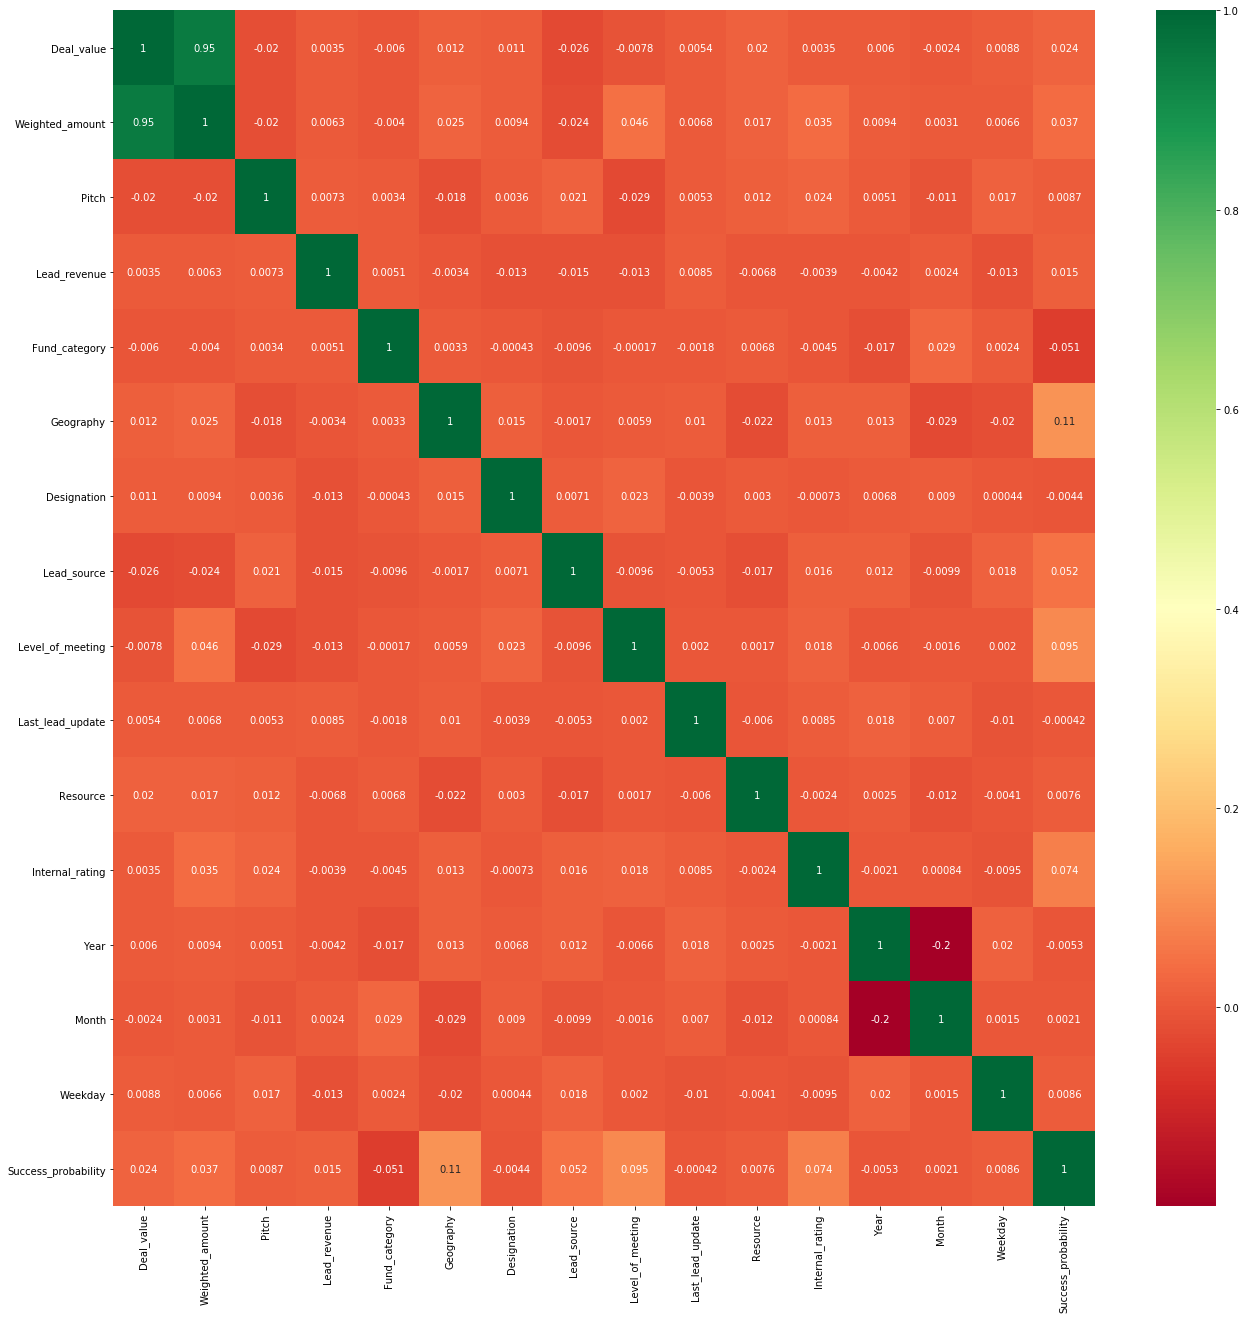

In [49]:
X = data.iloc[:,:-1]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(22,22))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We can see that year and month are highly not correlated with eachother, so we can drop one of the columns.

In [51]:
columns1=['Month']
data.drop(columns1,axis=1,inplace=True)

In [52]:
data.head()

,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Designation,Lead_source,Level_of_meeting,Last_lead_update,Resource,Internal_rating,Year,Weekday,Success_probability
0,279.922814,1437.798213,1,1,1,2,7,3,2,7,0,3,2020,6,73.6
1,110.375681,490.792013,1,2,3,1,4,2,0,2,0,5,2019,2,58.9
2,294.538122,1551.749464,0,2,3,2,8,1,0,3,0,4,2019,5,68.8
3,148.322247,684.340120,1,2,2,2,2,0,1,2,1,1,2021,5,64.5
4,336.168068,1252.949986,1,1,2,1,7,3,1,9,0,4,2019,2,62.4


In [54]:
data = data.sample(frac = 1)

In [55]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [58]:
#splitting for train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [59]:
#importing and defining the ML algorithm from scikit-learn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import r2_score

In [60]:
models=[DecisionTreeRegressor(random_state=0),        
        LinearRegression(),        
        SVR(kernel='rbf'),                
        RandomForestRegressor(n_estimators=200,random_state=0)      
        ]

In [61]:
model_names=['DecisionTreeRegressor','LinearRegression','SVR', 'RandomForestRegressor']

In [62]:
#we will now loop over each model and then we will evaluate the accuracy
acc=[] 
eval_acc={}
for model in range(len(models)):    
    regresssion_model=models[model]    
    regresssion_model.fit(X_train,y_train)    
    pred=regresssion_model.predict(X_test)    
    acc.append(r2_score(y_test,pred)) 
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}

# Importing test data.

In [65]:
missing_values = ["n/a", "na", "--",'?']
test = pd.read_csv("test.csv", na_values = missing_values)

In [66]:
test.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988$,NaN,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,...,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No,-1.0
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961$,2541758.2$,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,...,Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes,1.0
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433$,3041031.0$,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,...,Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable,5.0
3,TitleUS8NA,Durham-Crawford Inc,Music,218952$,1521716.4$,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,...,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No,5.0
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835$,2455218.75$,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,...,Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable,2.0


Doing all the same process which we did for train data, like handling missing values, discritization.

In [67]:
vars_with_na = [var for var in test.columns if test[var].isnull().mean() > 0]

# calculate the percentage of missing (as we did in section 3)
# using the isnull() and mean() methods from pandas
test_na = test[vars_with_na].isnull().mean()

# transform the array into a dataframe
test_na = pd.DataFrame(test_na.reset_index())

# add column names to the dataframe
test_na.columns = ['variable', 'na_percentage']

# order the dataframe according to percentage of na per variable
test_na.sort_values(by='na_percentage', ascending=False, inplace=True)

# show
test_na

,variable,na_percentage
6,Last_lead_update,0.171046
3,Geography,0.037745
2,Weighted_amount,0.028667
7,Resource,0.006689
1,Deal_value,0.002389
4,Location,0.001433
5,POC_name,0.000956
0,Industry,0.000478


In [68]:
test['Deal_value'] = test['Deal_value'].apply(clean_currency).astype('float')
test['Weighted_amount'] = test['Weighted_amount'].apply(clean_currency).astype('float')

In [69]:
test['Deal_value'].fillna(test['Deal_value'].mean(), inplace=True)
test['Weighted_amount'].fillna(test['Weighted_amount'].mean(), inplace=True)

In [70]:
test['Geography'].fillna(test['Geography']=='Missing', inplace = True)

In [71]:
test['Location'].fillna(test['Location'].mode()[0], inplace = True)

In [72]:
test['Industry'].fillna(test['Industry'].mode()[0], inplace = True)

In [73]:
test['Resource'].replace('We have all the requirements','Yes',inplace=True)
test['Resource'].replace('Deliverable','Yes',inplace=True)
test['Resource'].replace('Cannot deliver','No',inplace=True)
test['Resource'].replace('Not enough','No',inplace=True)

In [74]:
test['Resource'].fillna(test['Resource'].mode()[0], inplace = True)

In [75]:
test['Last_lead_update'].fillna(test['Last_lead_update']=='Missing', inplace = True)

In [76]:
columns=['Deal_title','Lead_name','Contact_no','Lead_POC_email','Internal_POC','Location','Hiring_candidate_role','POC_name','Industry','Fund_category','Industry']
test.drop(columns, inplace=True,axis=1)

In [77]:
test.columns

Index(['Deal_value', 'Weighted_amount', 'Date_of_creation', 'Pitch',
       'Lead_revenue', 'Geography', 'Designation', 'Lead_source',
       'Level_of_meeting', 'Last_lead_update', 'Resource', 'Internal_rating'],
      dtype='object')

In [78]:
test['Date_of_creation']=pd.to_datetime(test['Date_of_creation'],format='%Y-%m-%d')
test['Year']=test['Date_of_creation'].dt.year
test['Month']=test['Date_of_creation'].dt.month
test['Weekday']=test['Date_of_creation'].dt.weekday

In [79]:
test.head()

,Deal_value,Weighted_amount,Date_of_creation,Pitch,Lead_revenue,Geography,Designation,Lead_source,Level_of_meeting,Last_lead_update,Resource,Internal_rating,Year,Month,Weekday
0,200988.0,1.556917e+06,2020-04-15,Product_1,100 - 500 Million,India,Chairman/CEO/President,Marketing Event,Level 1,more than a month,No,-1.0,2020,4,2
1,409961.0,2.541758e+06,2021-01-23,Product_1,100 - 500 Million,USA,CEO/Co-Founder/Chairman,Marketing Event,Level 2,Up-to-date,Yes,1.0,2021,1,5
2,434433.0,3.041031e+06,2020-07-19,Product_1,100 - 500 Million,USA,Chairman/Chief Innovation Officer,Marketing Event,Level 2,Did not hear back after Level 1,Yes,5.0,2020,7,6
3,218952.0,1.521716e+06,2020-02-27,Product_2,100 - 500 Million,India,CEO/Chairman/President,Contact Email,Level 3,more than a month,No,5.0,2020,2,3
4,392835.0,2.455219e+06,2020-10-25,Product_1,500 Million - 1 Billion,USA,CEO/Co-Founder/Chairman,Others,Level 3,More than 2 weeks,Yes,2.0,2020,10,6


In [80]:
objList = test.select_dtypes(include = "object").columns
objList

Index(['Pitch', 'Lead_revenue', 'Geography', 'Designation', 'Lead_source',
       'Level_of_meeting', 'Last_lead_update', 'Resource'],
      dtype='object')

In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    test[feat] = le.fit_transform(test[feat].astype(str))

In [82]:
columns=['Date_of_creation']
test.drop(columns,axis=1,inplace=True)

In [83]:
test['Deal_value']=test['Deal_value']**(1/1.5)
test['Weighted_amount']=test['Weighted_amount']**(1/2)

In [84]:
test.head()

,Deal_value,Weighted_amount,Pitch,Lead_revenue,Geography,Designation,Lead_source,Level_of_meeting,Last_lead_update,Resource,Internal_rating,Year,Month,Weekday
0,3431.205682,1247.764671,0,0,1,4,1,0,10,0,-1.0,2020,4,2
1,5518.592959,1594.289246,0,0,2,2,1,1,9,1,1.0,2021,1,5
2,5736.080068,1743.855212,0,0,2,5,1,1,2,1,5.0,2020,7,6
3,3632.725739,1233.578696,1,0,1,1,0,2,10,0,5.0,2020,2,3
4,5363.810793,1566.913766,0,2,2,2,2,2,5,1,2.0,2020,10,6


In [85]:
columns=['Month']
test.drop(columns,axis=1,inplace=True)

In [95]:
data.drop('Fund_category',axis=1,inplace=True)

In [96]:
data.columns

Index(['Deal_value', 'Weighted_amount', 'Pitch', 'Lead_revenue', 'Geography',
       'Designation', 'Lead_source', 'Level_of_meeting', 'Last_lead_update',
       'Resource', 'Internal_rating', 'Year', 'Weekday',
       'Success_probability'],
      dtype='object')

In [97]:
test.columns

Index(['Deal_value', 'Weighted_amount', 'Pitch', 'Lead_revenue', 'Geography',
       'Designation', 'Lead_source', 'Level_of_meeting', 'Last_lead_update',
       'Resource', 'Internal_rating', 'Year', 'Weekday'],
      dtype='object')

In [98]:
train_data=data.iloc[:,:-1]
target=data.iloc[:,-1]
test_data=test.iloc[:]

#Decision tree.

In [99]:
model1=DecisionTreeRegressor(random_state=0)
model1.fit(train_data,target)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [100]:
test_prediction1=model1.predict(test_data)

In [101]:
test1=pd.read_csv('test.csv')

In [102]:
test1.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988$,NaN,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,...,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No,-1.0
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961$,2541758.2$,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,...,Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes,1.0
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433$,3041031.0$,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,...,Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable,5.0
3,TitleUS8NA,Durham-Crawford Inc,Music,218952$,1521716.4$,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,...,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No,5.0
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835$,2455218.75$,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,...,Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable,2.0


In [103]:
Deal_title = test1['Deal_title']
submission_df_3 = pd.DataFrame({
                  "Deal_title": Deal_title, 
                  "Success_probability": test_prediction1})

In [104]:
submission_df_3.shape

(2093, 2)

In [105]:
submission_df_3.to_csv('submission_3.csv', index=False)


In [107]:
model1=RandomForestRegressor(n_estimators=200,random_state=0)
model1.fit(train_data,target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [108]:
test_prediction10=model1.predict(test_data)

In [109]:
Deal_title = test1['Deal_title']
submission_df10 = pd.DataFrame({
                  "Deal_title": Deal_title, 
                  "Success_probability": test_prediction10})

In [110]:
submission_df10.to_csv('submission_df10.csv', index=False)


#linear Regression

In [112]:
model2=LinearRegression()
model2.fit(train_data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
test_prediction9=model2.predict(test_data)

In [114]:
Deal_title = test1['Deal_title']
submission_df9 = pd.DataFrame({
                  "Deal_title": Deal_title, 
                  "Success_probability": test_prediction9})

In [115]:
submission_df9.to_csv('submission_df9.csv', index=False)


#Xgboost

In [117]:
import xgboost as xg

In [118]:
model3 = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 1000, seed = 123)
  
# Fitting the model
model3.fit(train_data,target)
  
# Predict the model
test_prediction5=model3.predict(test_data)

[15:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [119]:
Deal_title = test1['Deal_title']
submission_df5 = pd.DataFrame({
                  "Deal_title": Deal_title, 
                  "Success_probability": test_prediction5})

In [120]:
submission_df5.to_csv('submission_df5.csv', index=False)
